In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Notebook information

### DATAFRAMES : 

- df = raw original data
- dfgf = df with grouped features (+dfgf_no_name)
- scaled_df = custom_scaler(dfgf_no_name)  ((scaled_dfgf_no_name = dfgf_no_name.div(total_score, axis=0)))
- scaled_df_name['Name'] = dfgf['Name']
- scaled_df_label_score
- scaled_df_no_score

### 2ed imported dataframe with just the positions one hot encoded 
- dfp = DataFramePosition(one_hot_encoded)
- dfm = DataFrame scaled + total_score + position(one_hot_encoded) on just the Names (Problem)

### 3ed imported DataFrame all the Data proprocessed and one hot encoded !
- dfc = DataFrame cleaned !

- merged_df_kmeans_NOGK = dataframe without de goalkeepers

## 7  New Scaling & Elbow method
We are testing a new scaling in which are going to sum of the numerical features and then divide each feature by the total sum. This scaling will supposedly enable us to identify better clusters of players that would have the same profile than previously.

Custom scaler
Divide each feature by the total sum for each player
Using .div() for element-wise division
Add the total score of the players to the dataset
Elbow method on the scaled values

# Data importation

In [42]:
df = pd.read_csv('../raw_data/FM_data_21.csv', low_memory = False)

In [43]:
#df.Name.value_counts()

In [44]:
df.rename(str.strip, axis='columns', inplace = True)

In [45]:
df.Name = df.Name.apply(lambda x: x.strip())

In [46]:
df.Club = df.Club.apply(lambda x: x.strip())

In [6]:
df[df['Name']=='Gabriel']

,Name,Club,Nat,Division,Position,Sec. Position,DoB,Age,Preferred Foot,Right Foot,...,Bal,Kic,Sta,Agi,Wor,Bra,Cmd,Fin,1v1,TRO
68,Gabriel,Arsenal,BRA,English Premier Division ...,D (C),-,19/12/1997 (22 years old),22,Left,Reasonable,...,14,1,15,13,14,14,1,6,3,2
14781,Gabriel,Gaz Metan Mediaş,BRA,Romanian First League ...,D (R),-,18/6/1988 (32 years old),32,Right Only,Very Strong,...,13,2,10,11,13,14,2,7,2,4
32747,Gabriel,Ethnikos,BRA,Greek Regional Division Group 6 ...,"D/WB (L), DM, M (C)","D/WB (L), M (C)",7/9/1994 (25 years old),25,Left,Weak,...,7,1,6,13,7,7,3,2,3,2
45020,Gabriel,BŠK Zmaj,BRA,Croatian Third League South ...,"DM, M (C)",M (C),15/12/1994 (25 years old),25,Either,Very Strong,...,5,3,10,10,6,6,4,1,2,2
68899,Gabriel,SLB,BRA,Portuguese Premier League ...,"DM, M (C)",-,18/9/1993 (26 years old),26,Left,Fairly Strong,...,16,1,13,12,11,16,3,10,2,2
70157,Gabriel,Lecce,BRA,Italian Serie B ...,GK,-,27/9/1992 (27 years old),27,Right Only,Very Strong,...,16,12,15,14,9,12,13,1,12,14
93575,Gabriel,Compostela,ESP,Spanish Second Division B1 ...,M/AM (R),M (R),8/12/1998 (21 years old),21,Right,Very Strong,...,7,4,9,13,12,5,3,12,1,3
115326,Gabriel,COR,BRA,Brazilian National First Division,"DM, M (C)",-,10/7/1992 (28 years old),28,Right,Very Strong,...,14,1,16,14,14,16,3,10,2,1
115427,Gabriel,ATM,BRA,Brazilian National First Division,D (C),-,14/3/1995 (25 years old),25,Right,Very Strong,...,14,3,14,15,14,14,1,8,1,1
115713,Gabriel,ALA,BRA,Brazilian National Second Division,"M (R), AM (RLC)","M (R), AM (LC)",6/1/1990 (30 years old),30,Right,Very Strong,...,6,2,12,12,14,11,1,11,1,2


In [47]:
# Create a new dataset with the numerical features for the followings steps.
columns_to_remove = ["Rc Injury", "Nat", "Division", "Position", "Sec. Position", "DoB", "Preferred Foot", "Right Foot", "Left Foot", "AT Lge Gls", "AT Lge Apps", "Wage", "Last Trans. Fee", "Value"]

In [48]:
# Remove specified columns
df.drop(columns=columns_to_remove, inplace=True)
df.drop(columns = ['Height', 'Weight', 'Age'], inplace=True)

In [49]:
#df.isnul().sum()
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [50]:
df.head(5)

,Name,Club,Agg,Jum,Pun,Nat .1,Vis,L Th,Lon,OtB,...,Bal,Kic,Sta,Agi,Wor,Bra,Cmd,Fin,1v1,TRO
0,Kevin De Bruyne,Man City,12,10,1,16,20,8,16,15,...,15,3,17,13,15,12,3,16,1,3
1,Harry Kane,Tottenham,11,13,2,16,18,6,16,16,...,13,3,17,12,18,16,2,19,3,3
2,Mohamed Salah,Liverpool,10,8,2,17,17,6,13,18,...,18,1,14,16,15,11,3,18,3,2
3,Sadio Mané,Liverpool,10,11,3,18,15,3,12,16,...,16,1,14,16,15,11,3,17,2,4
4,Son Heung-Min,Tottenham,8,10,2,16,12,6,16,18,...,12,2,16,15,17,6,2,18,2,1


In [51]:
df.iloc[:,2:] = df.iloc[:,2:].astype('float')

In [52]:
df

,Name,Club,Agg,Jum,Pun,Nat .1,Vis,L Th,Lon,OtB,...,Bal,Kic,Sta,Agi,Wor,Bra,Cmd,Fin,1v1,TRO
0,Kevin De Bruyne,Man City,12.0,10.0,1.0,16.0,20.0,8.0,16.0,15.0,...,15.0,3.0,17.0,13.0,15.0,12.0,3.0,16.0,1.0,3.0
1,Harry Kane,Tottenham,11.0,13.0,2.0,16.0,18.0,6.0,16.0,16.0,...,13.0,3.0,17.0,12.0,18.0,16.0,2.0,19.0,3.0,3.0
2,Mohamed Salah,Liverpool,10.0,8.0,2.0,17.0,17.0,6.0,13.0,18.0,...,18.0,1.0,14.0,16.0,15.0,11.0,3.0,18.0,3.0,2.0
3,Sadio Mané,Liverpool,10.0,11.0,3.0,18.0,15.0,3.0,12.0,16.0,...,16.0,1.0,14.0,16.0,15.0,11.0,3.0,17.0,2.0,4.0
4,Son Heung-Min,Tottenham,8.0,10.0,2.0,16.0,12.0,6.0,16.0,18.0,...,12.0,2.0,16.0,15.0,17.0,6.0,2.0,18.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,Nick Brown,Charlotte FC Academy,13.0,9.0,3.0,6.0,6.0,2.0,6.0,11.0,...,13.0,1.0,10.0,10.0,15.0,9.0,1.0,14.0,2.0,3.0
174570,Luis Alcalá,Charlotte FC Academy,15.0,7.0,2.0,13.0,6.0,2.0,5.0,10.0,...,11.0,2.0,8.0,9.0,6.0,6.0,2.0,11.0,2.0,3.0
174571,Devin Lee,Charlotte FC Academy,12.0,15.0,3.0,14.0,6.0,6.0,5.0,7.0,...,16.0,1.0,12.0,8.0,17.0,13.0,2.0,5.0,2.0,1.0
174572,Yeferson Suárez,Charlotte FC Academy,15.0,4.0,1.0,17.0,10.0,3.0,7.0,8.0,...,8.0,3.0,7.0,9.0,11.0,9.0,3.0,6.0,1.0,1.0


In [53]:
df.dropna(inplace=True)

# New DataFrame Creation with grouped features

In [13]:
# Grouping and creating new features by calculating the mean of each group

# Offensive Skills
df['shooting'] = df[['Fin', 'Lon', 'Fre', 'Pen']].mean(axis=1)
df['dribbling_control'] = df[['Dri', 'Fir', 'Fla', 'Tec']].mean(axis=1)
df['passing_vision'] = df[['Pas', 'Vis', 'L Th', 'Cro', 'Cor', 'OtB']].mean(axis=1)

# Defensive Skills
df['tackling_interception'] = df[['Tck', 'Mar', 'Pos', 'Ant']].mean(axis=1)
df['aerial_defense'] = df[['Hea', 'Jum', 'Aer']].mean(axis=1)

# Physical Attributes
df['speed_agility'] = df[['Acc', 'Pac', 'Agi']].mean(axis=1)
df['strength_stamina'] = df[['Str', 'Sta', 'Bal']].mean(axis=1)

# Mental and Tactical Attributes
df['decision_making'] = df[['Dec', 'Cmp']].mean(axis=1)
df['work_ethic_effort'] = df[['Wor', 'Det', 'Bra']].mean(axis=1)

# Leadership and Teamwork
df['leadership'] = df[['Ldr', 'Com']].mean(axis=1)
df['teamwork'] = df['Tea']

# Goalkeeping Abilities
df['goalkeeping_abilities'] = df[['Han', 'Ref', 'Kic', 'Thr', '1v1', 'Ecc', 'Cmd']].mean(axis=1)

# Behavioral Attributes
df['behavioral_attributes'] = df[['Agg', 'Pun']].mean(axis=1)


# Player Traits
df['player_traits'] = df['TRO']

#'dfgf' is the new DataFrame = DataFrame grouped features
dfgf = df[['Name','shooting', 'dribbling_control', 'passing_vision', 'tackling_interception', 'aerial_defense', 'speed_agility', 'strength_stamina', 'decision_making', 'work_ethic_effort', 'leadership', 'teamwork', 'goalkeeping_abilities', 'behavioral_attributes', 'player_traits']]


In [14]:
dfgf.head()

,Name,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits
0,Kevin De Bruyne,16.25,16.25,15.833333,9.50,5.666667,14.000000,15.000000,16.5,14.000000,7.0,14.0,1.714286,6.5,3.0
1,Harry Kane,16.75,13.75,13.833333,12.00,10.333333,12.333333,14.666667,17.0,17.666667,8.0,18.0,2.571429,6.5,3.0
2,Mohamed Salah,14.50,15.50,13.833333,9.75,6.666667,17.333333,15.666667,14.0,14.000000,6.5,14.0,2.142857,6.0,2.0
3,Sadio Mané,11.50,16.50,11.833333,11.25,9.000000,17.333333,14.000000,15.0,13.666667,4.5,15.0,2.142857,6.5,4.0
4,Son Heung-Min,13.25,14.50,12.333333,8.50,7.666667,15.333333,12.666667,15.0,12.000000,8.0,15.0,2.000000,5.0,1.0


In [16]:
dfgf_no_name = dfgf.iloc[:,1:]

# First elbow on dfgf_no_name

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

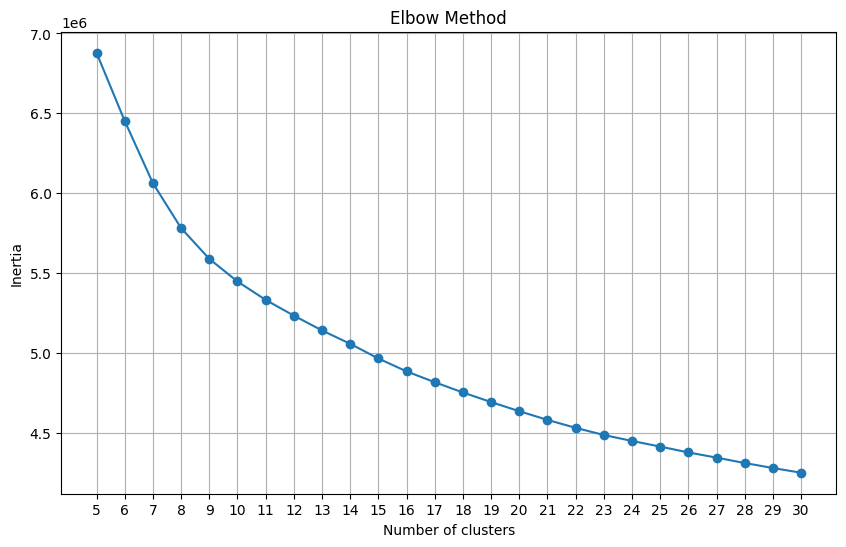

In [17]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfgf_no_name)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

#  New Scaling & Elbow method¶
We are testing a new scaling in which are going to sum of the numerical features and then divide each feature by the total sum. This scaling will supposedly enable us to identify better clusters of players that would have the same profile than previously.

Custom scaler
Divide each feature by the total sum for each player
Using .div() for element-wise division
Add the total score of the players to the dataset
Elbow method on the scaled values

# Custom_scaler

In [17]:
dfgf_no_name.sum(axis=1)

0         155.214286
1         166.404762
2         151.892857
3         152.226190
4         142.250000
             ...    
174569    100.130952
174570     86.261905
174571    101.297619
174572     99.892857
174573     90.357143
Length: 174324, dtype: float64

In [18]:
def custom_scaler(dfgf_no_name):
    total_score = dfgf_no_name.sum(axis=1)

    scaled_dfgf_no_name = dfgf_no_name.div(total_score, axis=0)

    return scaled_dfgf_no_name

In [19]:
scaled_df = custom_scaler(dfgf_no_name)
scaled_df

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961
174570,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778
174571,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872
174572,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011


## Dataframe scaled_df = scaled_dfgf_no_name

In [20]:
scaled_df.iloc[0].sum()

0.9999999999999999

In [208]:
# Adding the player Names to the DataFrame scaled_df + The total score min-max scaled 
scaled_df_name = scaled_df.copy()
scaled_df_name['Name'] = dfgf['Name']
scaled_df_name.drop(columns = 'goalkeeping_abilities', inplace = True)

In [209]:
# Adding the total score min-max scaled to the DataFrame
# Scale the total score (reshape is required as MinMaxScaler expects 2D input)
from sklearn.preprocessing import MinMaxScaler

def custom_scaler(dfgf_no_name):
    total_score = dfgf_no_name.sum(axis=1)
    return total_score

total_score = custom_scaler(dfgf_no_name)

scaler = MinMaxScaler()

scaled_total_score = scaler.fit_transform(total_score.values.reshape(-1, 1)).flatten()

scaled_df['scaled_total_score'] = scaled_total_score


scaled_df_label_score = scaled_df
scaled_df_label_score

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score,Name,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356,Kevin De Bruyne,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472,Harry Kane,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,0.798389,Mohamed Salah,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,0.800895,Sadio Mané,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,0.725906,Son Heung-Min,Son Heung-Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,0.409306,Nick Brown,Nick Brown
174570,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,0.305056,Luis Alcalá,Luis Alcalá
174571,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,0.418076,Devin Lee,Devin Lee
174572,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,0.407517,Yeferson Suárez,Yeferson Suárez


In [ ]:
#scaled_df = scaled_df_label_score.drop(columns='Name')
#scaled_df
#dfgf['label'] = km.labels_

# Elbow method on scaled_df_label_score

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

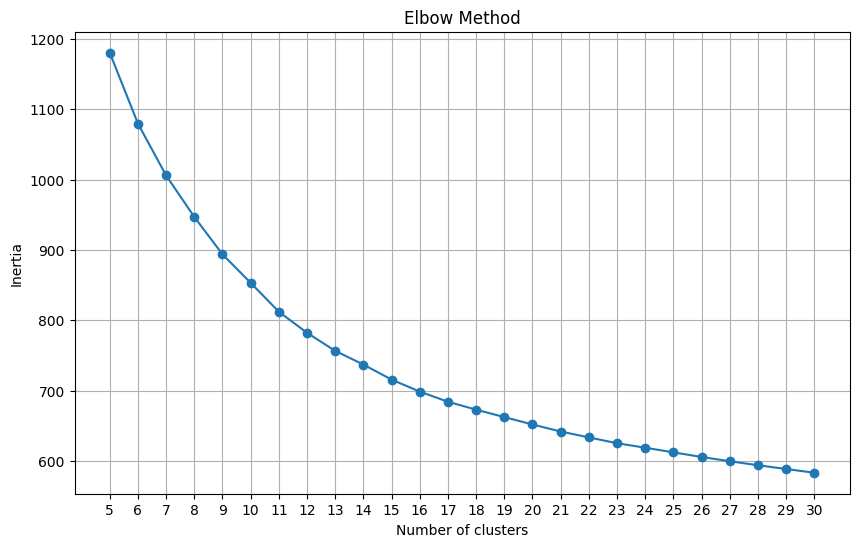

In [33]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df_label_score) #IMPORTANT df with LABEL + SCORE 
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Elbow method on scaled_df_no_score

In [23]:
scaled_df_no_score = scaled_df_label_score.drop(columns='scaled_total_score')
#scaled_df_no_score

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

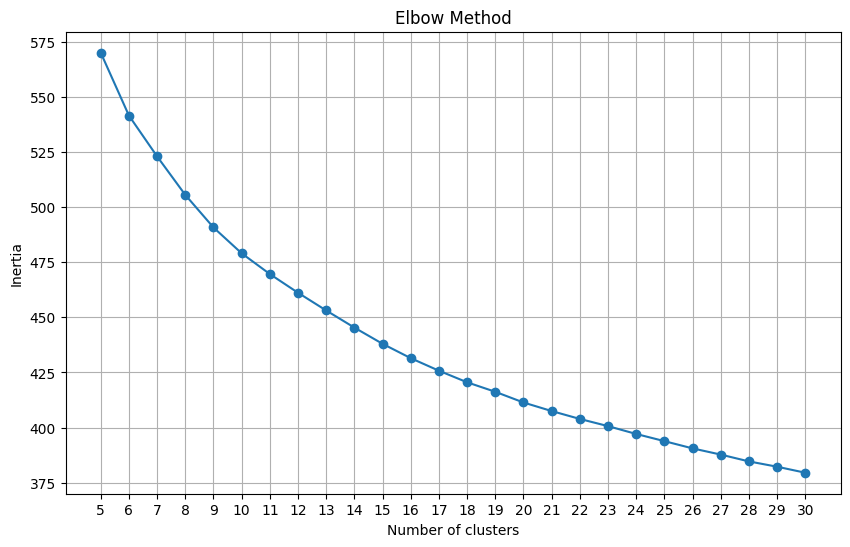

In [34]:
#scaled_df = scaled_df.drop(columns='scaled_total_score')
#scaled_df


# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df_no_score)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# K-means on 
- 1) scaled df WITH the score 
- 2) scaled df WITHOUT the score

## 1) scaled df WITHOUT the score

In [35]:
# Fit K-means
km = KMeans(n_clusters=16)
km.fit(scaled_df_no_score)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=16)

In [38]:
km.labels_

array([ 2,  4,  2, ...,  1, 10, 14], dtype=int32)

In [40]:
scaled_df_no_score['Name'] = dfgf['Name']
scaled_df_no_score['Label'] = km.labels_
#scaled_df_no_score.head(40)
scaled_df_no_score[['Name', 'Label']].head(60)

,Name,Label
0,Kevin De Bruyne,2
1,Harry Kane,4
2,Mohamed Salah,2
3,Sadio Mané,2
4,Son Heung-Min,2
5,Raheem Sterling,2
6,Bernardo Silva,2
7,Roberto Firmino,10
8,Virgil van Dijk,1
9,Bruno Fernandes,2


In [41]:
# Assuming 'km' is your fitted KMeans model
labels = km.labels_

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Number of unique labels
num_unique_labels = len(unique_labels)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 7053
Label: 1, Count: 16656
Label: 2, Count: 17003
Label: 3, Count: 5639
Label: 4, Count: 13164
Label: 5, Count: 6001
Label: 6, Count: 11965
Label: 7, Count: 12463
Label: 8, Count: 6837
Label: 9, Count: 10772
Label: 10, Count: 19861
Label: 11, Count: 9994
Label: 12, Count: 8883
Label: 13, Count: 8819
Label: 14, Count: 7073
Label: 15, Count: 12141


## 2) scaled df WITH the score

In [42]:
km = KMeans(n_clusters=16)
km.fit(scaled_df_label_score)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=16)

In [46]:
scaled_df_label_score['Name'] = dfgf['Name']
scaled_df_label_score['Label'] = km.labels_
#scaled_df_no_score.head(40)
scaled_df_no_score[['Name', 'Label']].head(60)

,Name,Label
0,Kevin De Bruyne,2
1,Harry Kane,4
2,Mohamed Salah,2
3,Sadio Mané,2
4,Son Heung-Min,2
...,...,...
145,Leandro Trossard,2
146,Ben Davies,10
147,Dean Henderson,8
148,Hugo Lloris,8


In [72]:
scaled_df_no_score[scaled_df_no_score['Label']==2][['Name', 'Label']].head(50)

,Name,Label
0,Kevin De Bruyne,2
2,Mohamed Salah,2
3,Sadio Mané,2
4,Son Heung-Min,2
5,Raheem Sterling,2
6,Bernardo Silva,2
9,Bruno Fernandes,2
12,Sergio Agüero,2
13,Thiago,2
15,İlkay Gündogan,2


In [68]:
scaled_df_no_score

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,Name,Label
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,Kevin De Bruyne,2
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,Harry Kane,4
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,Mohamed Salah,2
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,Sadio Mané,2
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,Son Heung-Min,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,Nick Brown,4
174570,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,Luis Alcalá,6
174571,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,Devin Lee,1
174572,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,Yeferson Suárez,10


In [45]:
# Assuming 'km' is your fitted KMeans model
labels = km.labels_

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Number of unique labels
num_unique_labels = len(unique_labels)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 4600
Label: 1, Count: 14258
Label: 2, Count: 10756
Label: 3, Count: 2715
Label: 4, Count: 14415
Label: 5, Count: 16161
Label: 6, Count: 4502
Label: 7, Count: 5938
Label: 8, Count: 17573
Label: 9, Count: 5506
Label: 10, Count: 6609
Label: 11, Count: 13608
Label: 12, Count: 6051
Label: 13, Count: 19593
Label: 14, Count: 19193
Label: 15, Count: 12846


# (Import Data one_hot_encoded : POSITION !)

## IMPORT dfp = DataFramePosition(one_hot_encoded)

In [95]:
#scaled_df_label_score = df a utiliser pour merge --------------------------------------------
#scaled_df_label_score.head()

#scaled_df_label_score MODIFIED -> DROPPING THE 'LABEL' COLUMN -------------
#scaled_df_label_score.drop(columns = 'Label', inplace=True)
scaled_df_label_score.head(2)

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score,Name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472,Harry Kane


In [97]:
scaled_df_label_score.columns

Index(['shooting', 'dribbling_control', 'passing_vision',
       'tackling_interception', 'aerial_defense', 'speed_agility',
       'strength_stamina', 'decision_making', 'work_ethic_effort',
       'leadership', 'teamwork', 'goalkeeping_abilities',
       'behavioral_attributes', 'player_traits', 'scaled_total_score', 'Name'],
      dtype='object')

In [178]:
scaled_df_label_score.name.value_counts()

 Gabriel                                    31
 João Paulo                                 23
 Rafinha                                    22
 Guilherme                                  22
 Eduardo                                    21
                                            ..
 Vlad Rezeanu                                1
 Daníel Andri Pálsson                        1
 Ionuţ Beudean                               1
 Sindri Hrafn Jónsson                        1
 Nguyen Van Hai                              1
Name: name, Length: 165451, dtype: int64

In [176]:
dfp = pd.read_csv('../raw_data/onehot.csv', low_memory = False)

In [177]:
dfp.name.value_counts()

                                            250
 Gabriel                                     31
 João Paulo                                  23
 Guilherme                                   22
 Rafinha                                     22
                                           ... 
 Vlad Rezeanu                                 1
 Daníel Andri Pálsson                         1
 Ionuţ Beudean                                1
 Sindri Hrafn Jónsson                         1
 Nguyen Van Hai                               1
Name: name, Length: 165452, dtype: int64

In [143]:
dfp.rename(str.strip, axis='columns', inplace = True)

In [144]:
dfp.columns

Index(['name', 'centerback', 'fullback', 'goalkeeper', 'midfielder',
       'no_position', 'striker', 'winger'],
      dtype='object')

In [148]:
# Create a new dataset with the numerical features for the followings steps.

columns_to_remove = ['club', 'nat', 'division', 'position', 'dob', 'age',
       'preferred foot', 'right foot', 'left foot', 'height', 'weight',
       'at lge gls', 'at lge apps', 'wage', 'last trans. fee', 'value', 'agg',
       'jum', 'pun', 'nat .1', 'vis', 'l th', 'lon', 'otb', 'tck', 'tec',
       'tea', 'cmp', 'fre', 'ref', 'pos', 'pen', 'pas', 'fla', 'ant', 'cro',
       'mar', 'ldr', 'cor', 'cnt', 'det', 'dec', 'hea', 'fir', 'com', 'acc',
       'pac', 'aer', 'str', 'thr', 'han', 'ecc', 'dri', 'bal', 'kic', 'sta',
       'agi', 'wor', 'bra', 'cmd', 'fin', '1v1', 'tro']

# Remove specified columns
dfp.drop(columns=columns_to_remove, inplace=True)

IndentationError: unexpected indent (1066093284.py, line 4)

In [146]:
dfp.head()

,name,centerback,fullback,goalkeeper,midfielder,no_position,striker,winger
0,Kevin De Bruyne,0,0,0,1,0,0,0
1,Harry Kane,0,0,0,0,0,1,0
2,Mohamed Salah,0,0,0,0,0,0,1
3,Sadio Mané,0,0,0,0,0,0,1
4,Son Heung-Min,0,0,0,0,0,0,1


In [150]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174574 entries, 0 to 174573
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         174574 non-null  object
 1   centerback   174574 non-null  int64 
 2   fullback     174574 non-null  int64 
 3   goalkeeper   174574 non-null  int64 
 4   midfielder   174574 non-null  int64 
 5   no_position  174574 non-null  int64 
 6   striker      174574 non-null  int64 
 7   winger       174574 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 10.7+ MB


In [152]:
nan_count_per_column = dfp.isna().sum()
nan_count_per_column

name           0
centerback     0
fullback       0
goalkeeper     0
midfielder     0
no_position    0
striker        0
winger         0
dtype: int64

In [153]:
df_cleaned = df.dropna()

In [154]:
scaled_df_label_score = scaled_df_label_score.rename(columns={'Name': 'name'})
scaled_df_label_score

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,0.798389,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,0.800895,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,0.725906,Son Heung-Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,0.409306,Nick Brown
174570,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,0.305056,Luis Alcalá
174571,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,0.418076,Devin Lee
174572,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,0.407517,Yeferson Suárez


## MERGE dfm = DataFrame scaled + total_score + position(one_hot_encoded)

In [155]:
scaled_df_label_score.drop_duplicates()

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,0.798389,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,0.800895,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,0.725906,Son Heung-Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,0.409306,Nick Brown
174570,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,0.305056,Luis Alcalá
174571,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,0.418076,Devin Lee
174572,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,0.407517,Yeferson Suárez


In [156]:
dfp.drop_duplicates()

,name,centerback,fullback,goalkeeper,midfielder,no_position,striker,winger
0,Kevin De Bruyne,0,0,0,1,0,0,0
1,Harry Kane,0,0,0,0,0,1,0
2,Mohamed Salah,0,0,0,0,0,0,1
3,Sadio Mané,0,0,0,0,0,0,1
4,Son Heung-Min,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
174569,Nick Brown,0,0,0,0,0,1,0
174570,Luis Alcalá,0,0,0,0,0,1,0
174571,Devin Lee,1,0,0,0,0,0,0
174572,Yeferson Suárez,0,0,0,1,0,0,0


In [136]:
#dfm.drop_duplicates()

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,player_traits,scaled_total_score,name,centerback,fullback,goalkeeper,midfielder,no_position,striker,winger
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0.019328,0.823356,Kevin De Bruyne,0,0,0,1,0,0,0
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,...,0.018028,0.907472,Harry Kane,0,0,0,0,0,1,0
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,...,0.013167,0.798389,Mohamed Salah,0,0,0,0,0,0,1
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,...,0.026277,0.800895,Sadio Mané,0,0,0,0,0,0,1
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,...,0.007030,0.725906,Son Heung-Min,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215492,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,...,0.029961,0.409306,Nick Brown,0,0,0,0,0,1,0
215493,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,...,0.034778,0.305056,Luis Alcalá,0,0,0,0,0,1,0
215494,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,...,0.009872,0.418076,Devin Lee,1,0,0,0,0,0,0
215495,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,...,0.010011,0.407517,Yeferson Suárez,0,0,0,1,0,0,0


In [157]:
scaled_df_label_score.shape

(174324, 16)

In [158]:
dfp.shape

(174574, 8)

In [159]:
dfp.name.nunique()

165452

In [160]:
scaled_df_label_score.name.nunique()

165451

In [161]:
dfp.name.nunique()

165452

In [162]:
dfp.name.value_counts()

                                            250
 Gabriel                                     31
 João Paulo                                  23
 Guilherme                                   22
 Rafinha                                     22
                                           ... 
 Vlad Rezeanu                                 1
 Daníel Andri Pálsson                         1
 Ionuţ Beudean                                1
 Sindri Hrafn Jónsson                         1
 Nguyen Van Hai                               1
Name: name, Length: 165452, dtype: int64

In [169]:
dfm = pd.merge(scaled_df_label_score, dfp, on = 'name',how='inner')
dfm

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,player_traits,scaled_total_score,name,centerback,fullback,goalkeeper,midfielder,no_position,striker,winger
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0.019328,0.823356,Kevin De Bruyne,0,0,0,1,0,0,0
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,...,0.018028,0.907472,Harry Kane,0,0,0,0,0,1,0
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,...,0.013167,0.798389,Mohamed Salah,0,0,0,0,0,0,1
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,...,0.026277,0.800895,Sadio Mané,0,0,0,0,0,0,1
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,...,0.007030,0.725906,Son Heung-Min,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215492,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,...,0.029961,0.409306,Nick Brown,0,0,0,0,0,1,0
215493,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,...,0.034778,0.305056,Luis Alcalá,0,0,0,0,0,1,0
215494,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,...,0.009872,0.418076,Devin Lee,1,0,0,0,0,0,0
215495,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,...,0.010011,0.407517,Yeferson Suárez,0,0,0,1,0,0,0


In [174]:
dfm.name = dfm.name.apply(lambda x: x.strip())

In [175]:
dfm[dfm['name']=='Gabriel']

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,player_traits,scaled_total_score,name,centerback,fullback,goalkeeper,midfielder,no_position,striker,winger
90,0.040196,0.071654,0.060586,0.101365,0.083888,0.095539,0.104860,0.101365,0.097870,0.041944,...,0.013981,0.731902,Gabriel,1,0,0,0,0,0,0
91,0.040196,0.071654,0.060586,0.101365,0.083888,0.095539,0.104860,0.101365,0.097870,0.041944,...,0.013981,0.731902,Gabriel,0,1,0,0,0,0,0
92,0.040196,0.071654,0.060586,0.101365,0.083888,0.095539,0.104860,0.101365,0.097870,0.041944,...,0.013981,0.731902,Gabriel,0,1,0,0,0,0,0
93,0.040196,0.071654,0.060586,0.101365,0.083888,0.095539,0.104860,0.101365,0.097870,0.041944,...,0.013981,0.731902,Gabriel,0,0,0,1,0,0,0
94,0.066289,0.087736,0.084486,0.085786,0.049392,0.088385,0.083186,0.081887,0.114381,0.046792,...,0.031195,0.620492,Gabriel,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130498,0.069564,0.080694,0.081622,0.058434,0.066782,0.129853,0.066782,0.077912,0.107592,0.066782,...,0.033391,0.331991,Gabriel,1,0,0,0,0,0,0
130499,0.069564,0.080694,0.081622,0.058434,0.066782,0.129853,0.066782,0.077912,0.107592,0.066782,...,0.033391,0.331991,Gabriel,0,1,0,0,0,0,0
130500,0.069564,0.080694,0.081622,0.058434,0.066782,0.129853,0.066782,0.077912,0.107592,0.066782,...,0.033391,0.331991,Gabriel,0,0,0,0,0,1,0
130501,0.069564,0.080694,0.081622,0.058434,0.066782,0.129853,0.066782,0.077912,0.107592,0.066782,...,0.033391,0.331991,Gabriel,0,0,0,1,0,0,0


In [170]:
dfm.name.value_counts()

 Gabriel                                    961
 João Paulo                                 529
 Guilherme                                  484
 Rafinha                                    484
 Eduardo                                    441
                                           ... 
 Ibryam Ibrekir                               1
 Vlad Rezeanu                                 1
 Daníel Andri Pálsson                         1
 Ionuţ Beudean                                1
 Nguyen Van Hai                               1
Name: name, Length: 165450, dtype: int64

# (KMeans on dfm)

In [164]:
dfm_no_name = dfm.drop(columns='name')
dfm_no_name

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,behavioral_attributes,player_traits,scaled_total_score,centerback,fullback,goalkeeper,midfielder,no_position,striker,winger
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0.041878,0.019328,0.823356,0,0,0,1,0,0,0
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,...,0.039061,0.018028,0.907472,0,0,0,0,0,1,0
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,...,0.039502,0.013167,0.798389,0,0,0,0,0,0,1
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,...,0.042700,0.026277,0.800895,0,0,0,0,0,0,1
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,...,0.035149,0.007030,0.725906,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215492,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,...,0.079895,0.029961,0.409306,0,0,0,0,0,1,0
215493,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,...,0.098537,0.034778,0.305056,0,0,0,0,0,1,0
215494,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,...,0.074039,0.009872,0.418076,1,0,0,0,0,0,0
215495,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,...,0.080086,0.010011,0.407517,0,0,0,1,0,0,0


In [165]:
km = KMeans(n_clusters=10)
km.fit(dfm_no_name)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [166]:
dfm_no_name['name'] = dfm['name']
dfm_no_name['label'] = km.labels_
dfm_no_name[['name', 'label']].head(60)

,name,label
0,Kevin De Bruyne,1
1,Harry Kane,9
2,Mohamed Salah,5
3,Sadio Mané,5
4,Son Heung-Min,5
5,Raheem Sterling,5
6,Bernardo Silva,1
7,Roberto Firmino,9
8,Virgil van Dijk,2
9,Bruno Fernandes,1


In [167]:
dfm_no_name[dfm_no_name['label']==7][['name', 'label']].head(50)

,name,label
20,Fabinho,7
98,Gabriel,7
102,Gabriel,7
132,Jack Harrison,7
188,Ben White,7
212,Ben Davies,7
213,Ben Davies,7
238,Aleksandar Mitrović,7
327,Joshua King,7
371,Tom Davies,7


In [130]:
# Assuming 'km' is your fitted KMeans model
labels = km.labels_

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Number of unique labels
num_unique_labels = len(unique_labels)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 15162
Label: 1, Count: 28927
Label: 2, Count: 21563
Label: 3, Count: 33055
Label: 4, Count: 15932
Label: 5, Count: 23261
Label: 6, Count: 15368
Label: 7, Count: 25222
Label: 8, Count: 21095
Label: 9, Count: 15912


# Import of cleaned DataFrame (Sacre)

In [24]:
#dfc = DataFrame cleaned !
dfc = pd.read_csv('../raw_data/clean_data.csv', low_memory = False)

In [25]:
dfc.name.value_counts()

Gabriel            39
Paulinho           37
Guilherme          31
João Paulo         31
João Pedro         30
                   ..
Cătălin Lupaşcu     1
Rareş Florea        1
Dennis Asavei       1
Taha Zbidat         1
Nguyen Van Hai      1
Name: name, Length: 162669, dtype: int64

In [28]:
dfc.rename(str.strip, axis='columns', inplace = True)

In [29]:
dfc.columns

Index(['name', 'club', 'nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'agg', 'jum', 'pun', 'vis', 'l th',
       'lon', 'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
       'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec',
       'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc',
       'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1',
       'tro', 'centerback', 'fullback', 'goalkeeper', 'midfielder', 'striker',
       'winger', 'division_rating', 'nat_rating', 'club_rating', 'either_left',
       'either_right', 'left', 'right'],
      dtype='object')

In [30]:
dfc.head(3)

,name,club,nat,position,dob,age,height,weight,wage,last trans. fee,...,midfielder,striker,winger,division_rating,nat_rating,club_rating,either_left,either_right,left,right
0,Kevin De Bruyne,Man City,BEL,"M (RLC), AM (C)",28/6/1991 (29 years old),29.0,181.0,68.0,1091000.0,60000000.0,...,1,0,0,93.8,1793.71,2013.0,0,1,0,0
1,Harry Kane,Tottenham,ENG,"AM (C), ST (C)",28/7/1993 (27 years old),26.0,188.0,86.0,948000.0,0.0,...,0,1,0,93.8,1807.88,1837.0,1,0,0,0
2,Mohamed Salah,Liverpool,EGY,"AM (RL), ST (C)",15/6/1992 (28 years old),28.0,175.0,72.0,948000.0,37500000.0,...,0,0,1,93.8,1511.95,2042.0,0,0,1,0


In [31]:
# Create a new dataset with the numerical features for the followings steps.

columns_to_remove = ['nat', 'position', 'dob', 'age', 'height', 'weight',
       'wage', 'last trans. fee', 'value', 'agg', 'jum', 'pun', 'vis', 'l th',
       'lon', 'otb', 'tck', 'tec', 'tea', 'cmp', 'fre', 'ref', 'pos', 'pen',
       'pas', 'fla', 'ant', 'cro', 'mar', 'ldr', 'cor', 'cnt', 'det', 'dec',
       'hea', 'fir', 'com', 'acc', 'pac', 'aer', 'str', 'thr', 'han', 'ecc',
       'dri', 'bal', 'kic', 'sta', 'agi', 'wor', 'bra', 'cmd', 'fin', '1v1',
       'tro', 'division_rating', 'nat_rating', 'club_rating']

# Remove specified columns
dfc.drop(columns=columns_to_remove, inplace=True)

In [32]:
dfc.head()

,name,club,centerback,fullback,goalkeeper,midfielder,striker,winger,either_left,either_right,left,right
0,Kevin De Bruyne,Man City,0,0,0,1,0,0,0,1,0,0
1,Harry Kane,Tottenham,0,0,0,0,1,0,1,0,0,0
2,Mohamed Salah,Liverpool,0,0,0,0,0,1,0,0,1,0
3,Sadio Mané,Liverpool,0,0,0,0,0,1,0,0,0,1
4,Son Heung-Min,Tottenham,0,0,0,0,0,1,1,0,0,0


In [54]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174324 entries, 0 to 174323
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          174324 non-null  object
 1   club          174324 non-null  object
 2   centerback    174324 non-null  int64 
 3   fullback      174324 non-null  int64 
 4   goalkeeper    174324 non-null  int64 
 5   midfielder    174324 non-null  int64 
 6   striker       174324 non-null  int64 
 7   winger        174324 non-null  int64 
 8   either_left   174324 non-null  int64 
 9   either_right  174324 non-null  int64 
 10  left          174324 non-null  int64 
 11  right         174324 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 16.0+ MB


# Column rename for the merge ! merged_df = DataFrame final !

In [61]:
#scaled_df_label_score = scaled_df_label_score.rename(columns={'Name': 'name'})
scaled_df_label_score['name'] = dfgf['Name']
scaled_df_label_score

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,teamwork,goalkeeping_abilities,behavioral_attributes,player_traits,scaled_total_score,Name,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,0.090198,0.011045,0.041878,0.019328,0.823356,Kevin De Bruyne,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,0.108170,0.015453,0.039061,0.018028,0.907472,Harry Kane,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,0.092170,0.014108,0.039502,0.013167,0.798389,Mohamed Salah,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,0.098538,0.014077,0.042700,0.026277,0.800895,Sadio Mané,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,0.105448,0.014060,0.035149,0.007030,0.725906,Son Heung-Min,Son Heung-Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174569,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,0.099869,0.017120,0.079895,0.029961,0.409306,Nick Brown,Nick Brown
174570,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,0.092741,0.028153,0.098537,0.034778,0.305056,Luis Alcalá,Luis Alcalá
174571,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,0.128335,0.016923,0.074039,0.009872,0.418076,Devin Lee,Devin Lee
174572,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,0.160172,0.021452,0.080086,0.010011,0.407517,Yeferson Suárez,Yeferson Suárez


In [62]:
scaled_df_label_score = scaled_df_label_score.reset_index(drop=True)

In [65]:
merged_df = pd.merge(scaled_df_label_score, dfc, left_index=True, right_index=True)
merged_df

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,centerback,fullback,goalkeeper,midfielder,striker,winger,either_left,either_right,left,right
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0,0,0,1,0,0,0,1,0,0
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,...,0,0,0,0,1,0,1,0,0,0
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,...,0,0,0,0,0,1,0,0,1,0
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,...,0,0,0,0,0,1,0,0,0,1
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174319,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,...,0,0,0,0,1,0,0,0,0,1
174320,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,...,0,0,0,0,1,0,0,0,0,1
174321,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,...,1,0,0,0,0,0,0,0,0,1
174322,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,...,0,0,0,1,0,0,0,0,0,1


In [129]:
merged_df.columns

Index(['shooting', 'dribbling_control', 'passing_vision',
       'tackling_interception', 'aerial_defense', 'speed_agility',
       'strength_stamina', 'decision_making', 'work_ethic_effort',
       'leadership', 'teamwork', 'goalkeeping_abilities',
       'behavioral_attributes', 'player_traits', 'scaled_total_score', 'Name',
       'name_x', 'name_y', 'club', 'centerback', 'fullback', 'goalkeeper',
       'midfielder', 'striker', 'winger', 'either_left', 'either_right',
       'left', 'right'],
      dtype='object')

In [68]:
merged_df.Name.value_counts()

Gabriel            39
Paulinho           37
Guilherme          31
João Paulo         31
João Pedro         30
                   ..
Cătălin Lupaşcu     1
Rareş Florea        1
Dennis Asavei       1
Taha Zbidat         1
Nguyen Van Hai      1
Name: Name, Length: 162669, dtype: int64

In [70]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174324 entries, 0 to 174323
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   shooting               174324 non-null  float64
 1   dribbling_control      174324 non-null  float64
 2   passing_vision         174324 non-null  float64
 3   tackling_interception  174324 non-null  float64
 4   aerial_defense         174324 non-null  float64
 5   speed_agility          174324 non-null  float64
 6   strength_stamina       174324 non-null  float64
 7   decision_making        174324 non-null  float64
 8   work_ethic_effort      174324 non-null  float64
 9   leadership             174324 non-null  float64
 10  teamwork               174324 non-null  float64
 11  goalkeeping_abilities  174324 non-null  float64
 12  behavioral_attributes  174324 non-null  float64
 13  player_traits          174324 non-null  float64
 14  scaled_total_score     174324 non-nu

In [157]:
merged_df_kmeans = merged_df.copy()
#merged_df_kmeans

In [158]:
merged_df_kmeans_NOGK = merged_df_kmeans[merged_df_kmeans.goalkeeper != 1]

In [159]:
merged_df_kmeans_NOGK = merged_df_kmeans_NOGK.drop(columns=['Name', 'name_x', 'name_y', 'club', 'goalkeeper'])

In [160]:
km = KMeans(n_clusters=12)
km.fit(merged_df_kmeans_NOGK)

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12)

In [174]:
merged_df_kmeans_NOGK['name'] = merged_df['Name']
merged_df_kmeans_NOGK['label'] = km.labels_
merged_df_kmeans_NOGK[['name', 'label']].head(60)

,name,label
0,Kevin De Bruyne,10
1,Harry Kane,9
2,Mohamed Salah,7
3,Sadio Mané,3
4,Son Heung-Min,7
5,Raheem Sterling,3
6,Bernardo Silva,2
7,Roberto Firmino,0
8,Virgil van Dijk,5
9,Bruno Fernandes,1


In [183]:
merged_df_kmeans_NOGK[merged_df_kmeans_NOGK['label']==5].sort_values(by='scaled_total_score', ascending=False)[['name', 'label']].head(50)

,name,label
69054,Sergio Ramos,5
402,Alfie Mawson,5
8,Virgil van Dijk,5
522,Fernandinho,5
14,Fabinho,5
68818,Leonardo Bonucci,5
68657,Emre Can,5
68575,Matthijs de Ligt,5
68560,Marquinhos,5
71764,Marco Parolo,5


In [166]:
merged_df_kmeans_NOGK[merged_df_kmeans_NOGK['name']=='Marc-André ter Stegen']

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,fullback,midfielder,striker,winger,either_left,either_right,left,right,name,label


In [167]:
# Assuming 'km' is your fitted KMeans model
labels = km.labels_

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Number of unique labels
num_unique_labels = len(unique_labels)

# Print the unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")

Label: 0, Count: 22387
Label: 1, Count: 35539
Label: 2, Count: 6449
Label: 3, Count: 17360
Label: 4, Count: 14024
Label: 5, Count: 27969
Label: 6, Count: 11855
Label: 7, Count: 7652
Label: 8, Count: 6752
Label: 9, Count: 2832
Label: 10, Count: 1147
Label: 11, Count: 1880


# Elbow method on merged_df_kmeans

/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ninomeessen/.pyenv/versions/3.10.6/envs

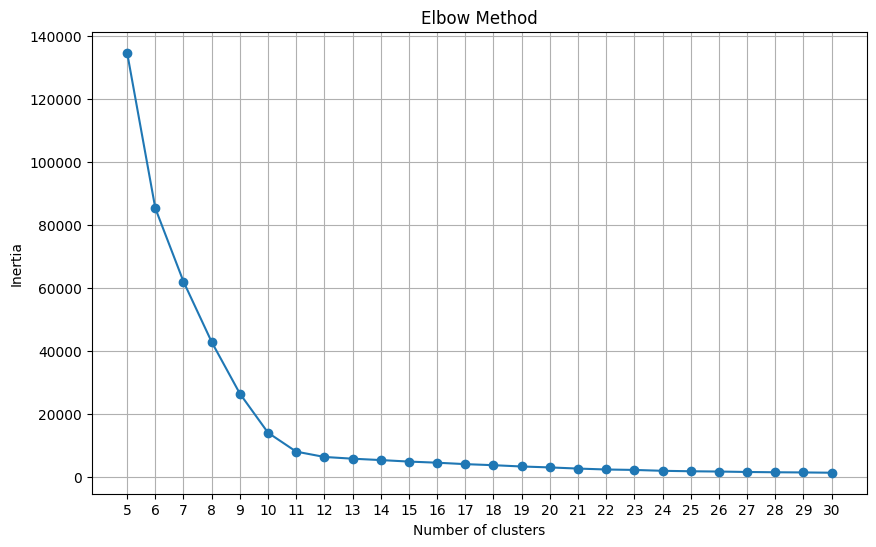

In [172]:
merged_df_kmeans_NOGK = merged_df_kmeans_NOGK.drop(columns=['name'])
# Initialize an empty list to store the inertia values
inertia_values = []

# Range of cluster numbers to try (from 5 to 30)
cluster_range = range(5, 31)

# Calculate inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df_kmeans_NOGK) #IMPORTANT df with LABEL + SCORE 
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# KNN on the merged_df_kmeans_NOGK

In [176]:
#merged_df_kmeans_NOGK_head_20 = merged_df_kmeans_NOGK.head(20)

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,fullback,midfielder,striker,winger,either_left,either_right,left,right,label,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0,1,0,0,0,1,0,0,10,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,...,0,0,1,0,1,0,0,0,9,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,...,0,0,0,1,0,0,1,0,7,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,...,0,0,0,1,0,0,0,1,3,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,...,0,0,0,1,1,0,0,0,7,Son Heung-Min
5,0.071250,0.103482,0.082559,0.071250,0.047500,0.122142,0.097261,0.088214,0.090476,0.044107,...,0,0,0,1,0,0,0,1,3,Raheem Sterling
6,0.086849,0.108956,0.085270,0.061584,0.040003,0.101060,0.086322,0.101060,0.107376,0.044214,...,0,1,0,0,0,0,1,0,2,Bernardo Silva
7,0.070192,0.104509,0.083191,0.088910,0.056154,0.085271,0.097749,0.096710,0.093590,0.024957,...,0,0,1,0,0,0,0,1,0,Roberto Firmino
8,0.055342,0.085385,0.056923,0.107522,0.078006,0.090656,0.096981,0.104360,0.094872,0.060086,...,0,0,0,0,0,0,0,1,5,Virgil van Dijk
9,0.106599,0.100235,0.090158,0.052504,0.044549,0.089098,0.091219,0.085916,0.112433,0.057277,...,0,1,0,0,0,0,0,1,1,Bruno Fernandes


In [177]:
#merged_df_kmeans_NOGK_head_20.to_csv('/Users/ninomeessen/code/maximegoossens99/Moneyball/merged_df_kmeans_NOGK_head_20.csv', index=False)

In [175]:
merged_df_kmeans_NOGK[merged_df_kmeans_NOGK['name']=='Kevin De Bruyne']

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,fullback,midfielder,striker,winger,either_left,either_right,left,right,label,name
0,0.104694,0.104694,0.10201,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0,1,0,0,0,1,0,0,10,Kevin De Bruyne


In [178]:
merged_df_kmeans_NOGK.columns

Index(['shooting', 'dribbling_control', 'passing_vision',
       'tackling_interception', 'aerial_defense', 'speed_agility',
       'strength_stamina', 'decision_making', 'work_ethic_effort',
       'leadership', 'teamwork', 'goalkeeping_abilities',
       'behavioral_attributes', 'player_traits', 'scaled_total_score',
       'centerback', 'fullback', 'midfielder', 'striker', 'winger',
       'either_left', 'either_right', 'left', 'right', 'label', 'name'],
      dtype='object')

In [211]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def find_closest_players(player_name, num_neighbors, data, feature_columns):
    """
    Find the closest players based on the KNN model for a given player.

    Parameters:
    player_name (str): The name of the player to find neighbors for.
    num_neighbors (int): The number of closest neighbors to find.
    data (pd.DataFrame): The DataFrame containing player data.
    feature_columns (list): List of columns to use as features in KNN.

    Returns:
    list: A list of closest player names.
    """
    if player_name not in data['name'].values:
        return f"Player '{player_name}' not found in the dataset."
    
    # Extract the specified player's statistics
    player_stats = data[data['name'] == player_name][feature_columns].to_numpy()

    # Fit the NearestNeighbors model
    nbrs = NearestNeighbors(n_neighbors=num_neighbors + 1).fit(data[feature_columns])

    # Find the nearest neighbors
    distances, indices = nbrs.kneighbors(player_stats)

    # Get the names of similar players
    # Exclude the first one if it's the player themselves
    similar_players_indices = indices.flatten()
    if similar_players_indices[0] == data[data['name'] == player_name].index[0]:
        similar_players_indices = similar_players_indices[1:]
    else:
        similar_players_indices = similar_players_indices[:-1]
    
    similar_players = data.iloc[similar_players_indices].sort_values(by='scaled_total_score',ascending=False)[['name', 'scaled_total_score']]
    
    return similar_players

# Example usage
# Assuming 'merged_df_kmeans_NOGK' is your DataFrame and it's already scaled
# Replace 'player_name' with the name of the player you're interested in
# Replace 'num_neighbors' with the number of neighbors you want to find
# 'feature_columns' should be the list of columns used as features in KNN
player_name = 'Mehdi Taremi'
num_neighbors = 10
feature_columns = merged_df_kmeans_NOGK.columns.drop('name')  # Adjust as needed

closest_players = find_closest_players(player_name, num_neighbors, merged_df_kmeans_NOGK, feature_columns)
print("Closest Players:", closest_players[1:])


# add sorting

Closest Players:                    name  scaled_total_score
723          Max Gradel            0.711588
47          Richarlison            0.710515
68795      Mehdi Taremi            0.708904
143058     M'Baye Niang            0.705235
55         Divock Origi            0.704787
943           Jan Kopic            0.699150
71315   Pablo Chavarría            0.698881
69173   Niclas Füllkrug            0.689575
70042     David Okereke            0.674362


/Users/ninomeessen/.pyenv/versions/3.10.6/envs/Moneyball/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


# Teams scores 

In [210]:
merged_df_kmeans_NOGK

,shooting,dribbling_control,passing_vision,tackling_interception,aerial_defense,speed_agility,strength_stamina,decision_making,work_ethic_effort,leadership,...,fullback,midfielder,striker,winger,either_left,either_right,left,right,label,name
0,0.104694,0.104694,0.102010,0.061206,0.036509,0.090198,0.096641,0.106305,0.090198,0.045099,...,0,1,0,0,0,1,0,0,10,Kevin De Bruyne
1,0.100658,0.082630,0.083131,0.072113,0.062098,0.074116,0.088139,0.102161,0.106167,0.048076,...,0,0,1,0,1,0,0,0,9,Harry Kane
2,0.095462,0.102046,0.091073,0.064190,0.043891,0.114116,0.103143,0.092170,0.092170,0.042793,...,0,0,0,1,0,0,1,0,7,Mohamed Salah
3,0.075545,0.108391,0.077735,0.073903,0.059123,0.113866,0.091968,0.098538,0.089779,0.029561,...,0,0,0,1,0,0,0,1,3,Sadio Mané
4,0.093146,0.101933,0.086702,0.059754,0.053896,0.107791,0.089045,0.105448,0.084359,0.056239,...,0,0,0,1,1,0,0,0,7,Son Heung-Min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174319,0.077399,0.099869,0.059922,0.039948,0.053264,0.113185,0.093211,0.094876,0.106527,0.034954,...,0,0,1,0,0,0,0,1,0,Nick Brown
174320,0.069556,0.121722,0.065691,0.040574,0.050235,0.108198,0.092741,0.092741,0.081148,0.023185,...,0,0,1,0,0,0,0,1,0,Luis Alcalá
174321,0.044424,0.054295,0.062522,0.091315,0.085556,0.075685,0.115172,0.083911,0.138207,0.019744,...,0,0,0,0,0,0,0,1,5,Devin Lee
174322,0.062567,0.085091,0.068407,0.065070,0.030032,0.073412,0.060064,0.120129,0.083423,0.080086,...,0,1,0,0,0,0,0,1,1,Yeferson Suárez
